In [4]:
import pandas as pd
import numpy as np
import re
from itertools import product, combinations
from rdkit import Chem
from rdkit.Chem import Descriptors
import networkx as nx
from pyvis.network import Network
from rdkit.Chem.rdChemReactions import PreprocessReaction
from rdkit.Chem import MolFromSmiles, AllChem
from rdkit.Chem import rdChemReactions
import os
import matplotlib.pyplot as plt

In [44]:
G = nx.read_graphml("g.graphml")

In [63]:
drugs = pd.read_pickle("pickled_data/drug_hit_ChEBIs.p")
unique_drugs = drugs["drug_ChEBI"].unique()

In [65]:
unique_drugs

array([17823,  4167, 38685, 17026, 28262])

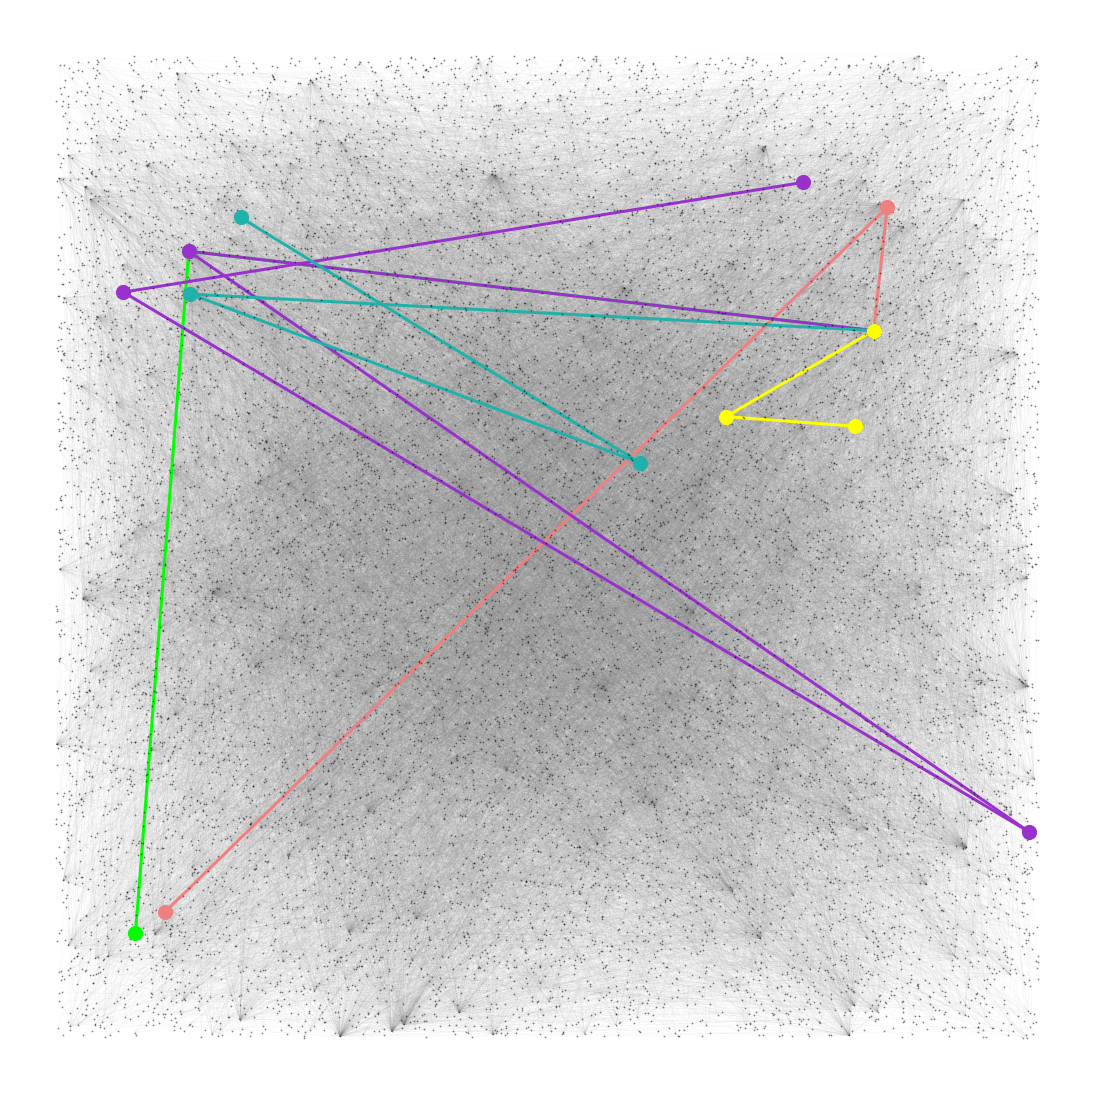

In [90]:
plt.figure(figsize=(15,15))
pos = nx.random_layout(G)
options = {
    "node_color": "black",
    "node_size": 3,
    "edge_color": "grey",
    "linewidths": 0,
    "width": 0.05,
    "alpha": 0.5
}
# draw path in red
nx.draw(G,pos,**options)
colours = ["lightcoral","lime", "darkorchid","lightseagreen","yellow"]
for x in range(len(unique_drugs)):
    path = nx.shortest_path(G,source='15361',target=str(unique_drugs[x]))
    path_edges = list(zip(path,path[1:]))
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_size=200,node_color=colours[x])
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color=colours[x],width=3)
plt.axis('equal')
plt.savefig("graph_hits.png",bbox_inches="tight")
plt.show()


In [68]:
colours[0]

'lightchoral'

In [36]:
path_edges

[('145044', '58885')]

In [42]:
path

['145044', '58885']